In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
table_file = "../data/noise_sweep_output_rank6.csv"
data = pd.read_csv(table_file)

In [3]:
data['model'].replace({1: 'indep(N)', 2: 'indep(6)', 3: 'TVART(6)'}, inplace=True)
data.tail()

,N,noise_std,model,err_inf,err_2,err_fro,model_MSE,true_MSE
373,320,1.0,indep(6),0.035183,1.364743,1.644899,9.885066e-01,1.022878
374,320,1.0,TVART(6),0.009981,0.414176,0.564482,9.898093e-01,1.022878
375,320,1.0,indep(N),0.076741,1.390567,4.453199,1.406699e-29,1.009997
376,320,1.0,indep(6),0.041938,1.568835,1.809168,9.732404e-01,1.009997
377,320,1.0,TVART(6),0.011207,0.415515,0.579431,9.744336e-01,1.009997


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


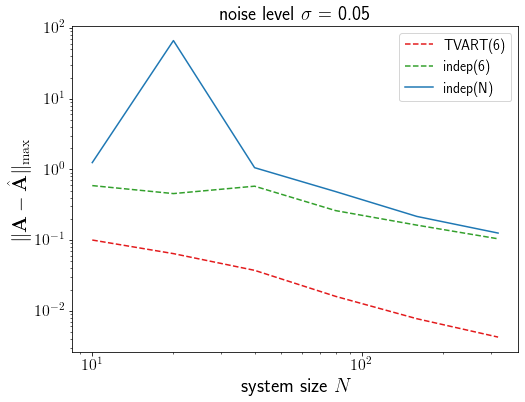

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


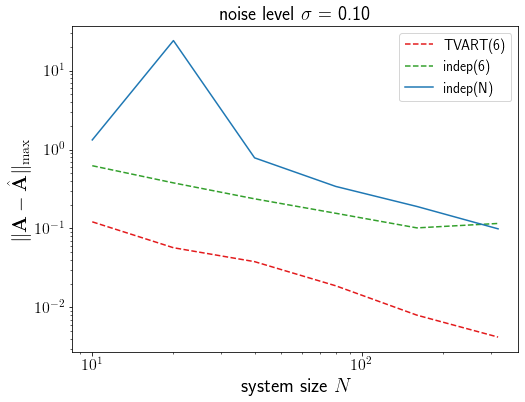

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


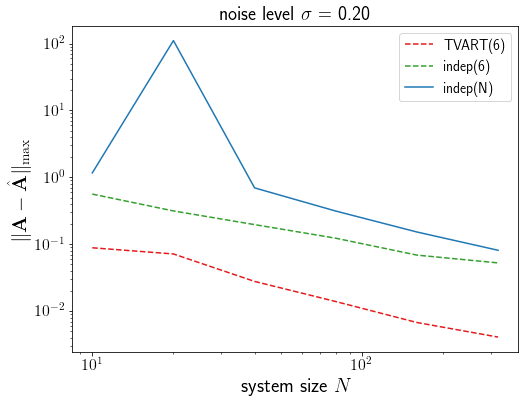

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


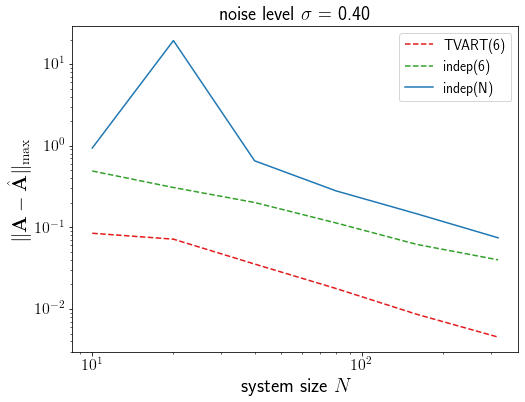

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


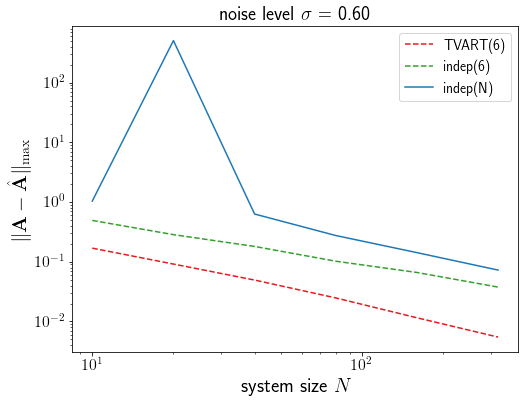

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


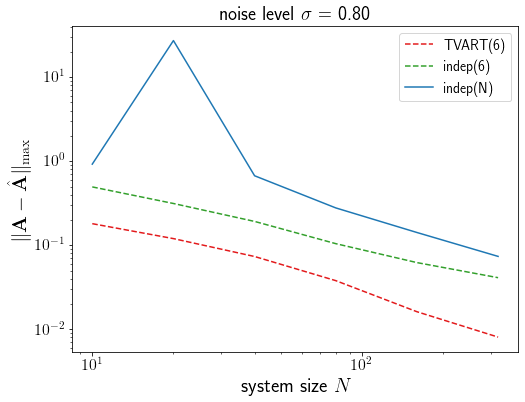

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


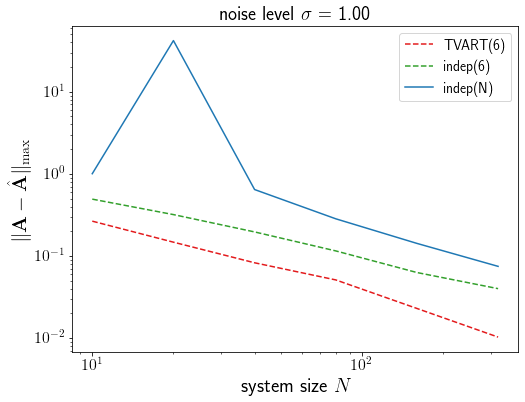

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


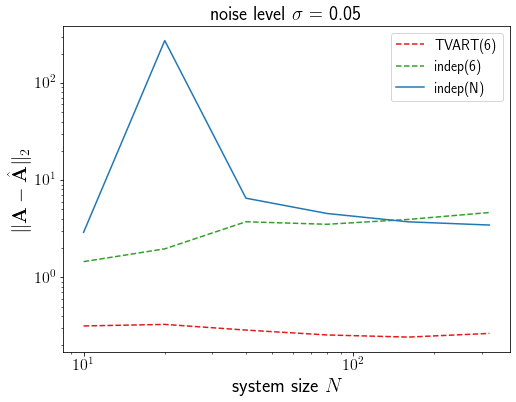

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


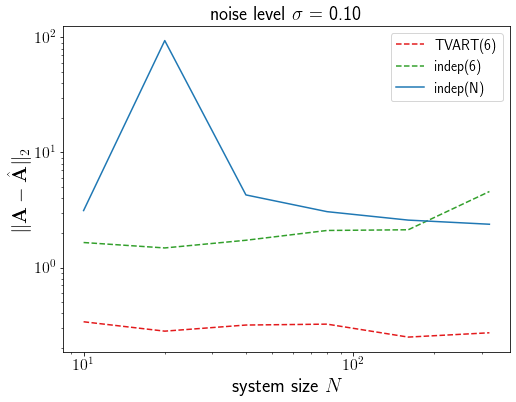

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


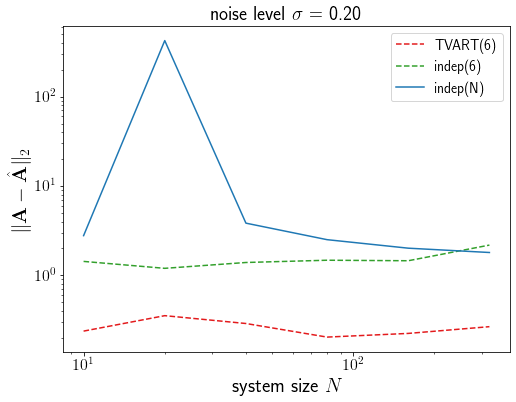

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


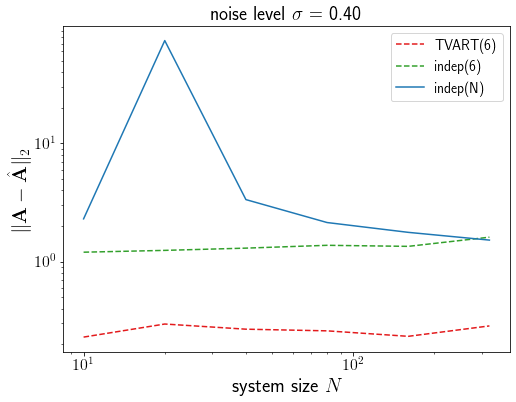

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


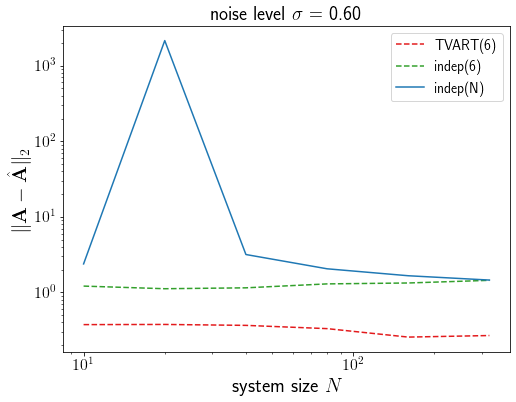

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


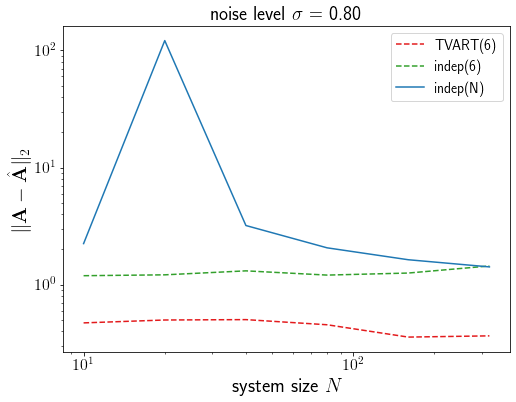

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


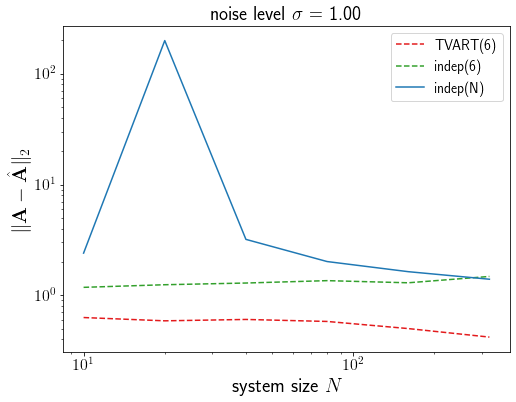

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


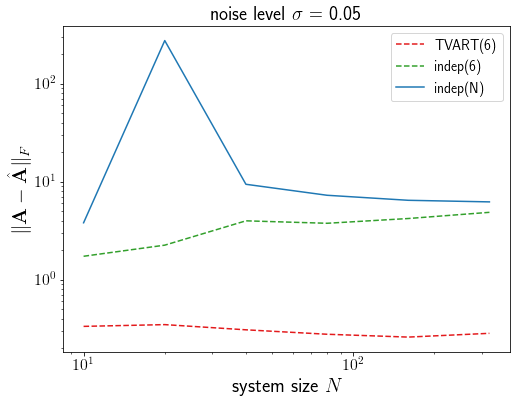

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


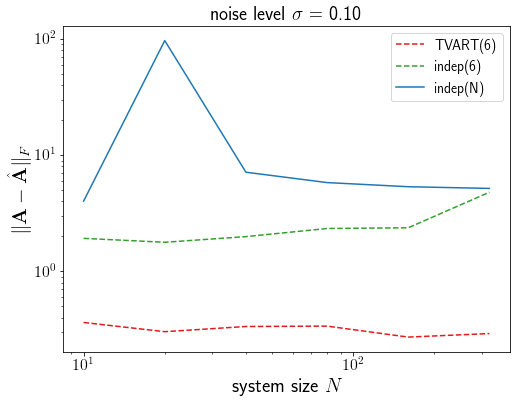

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


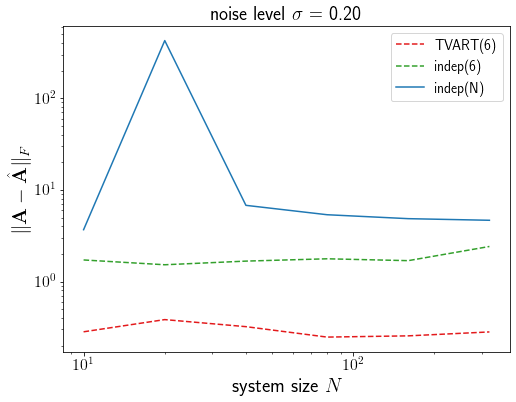

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


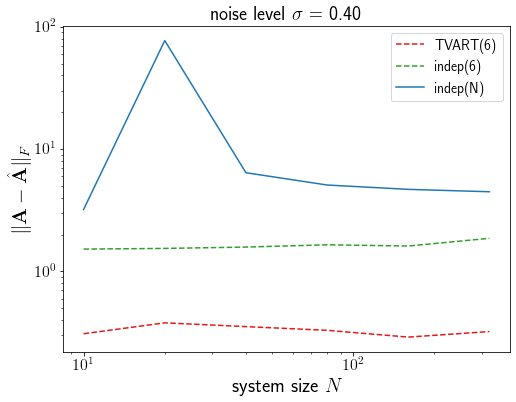

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


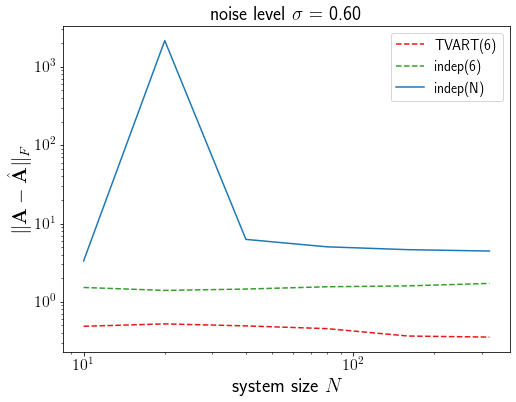

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


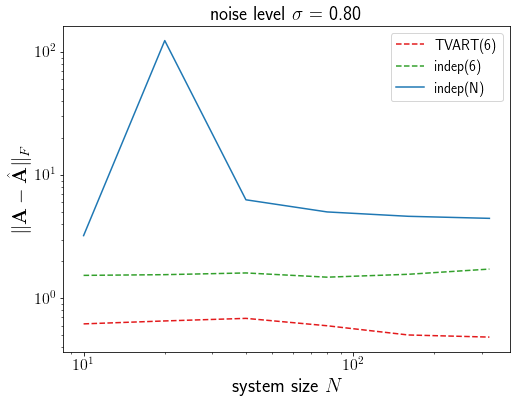

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


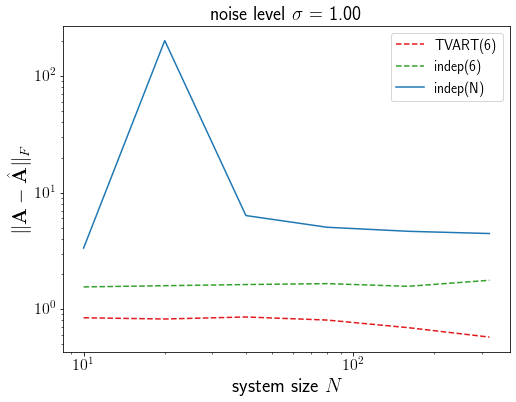

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


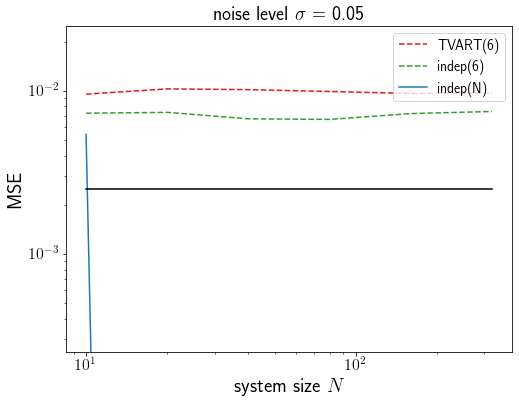

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


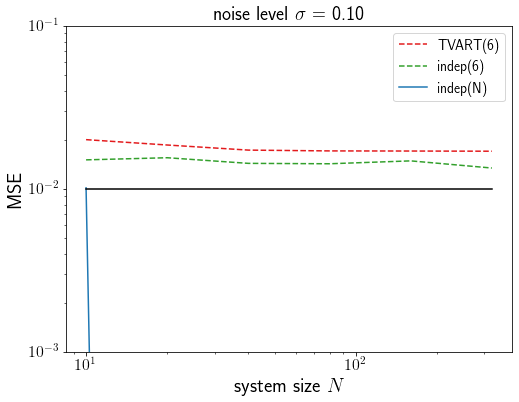

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


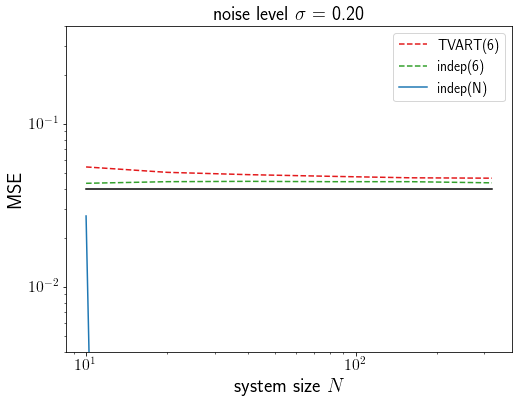

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


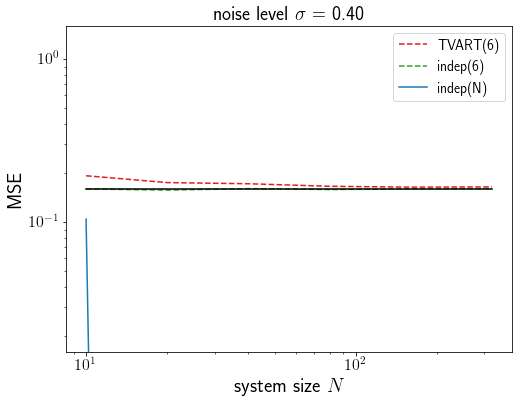

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


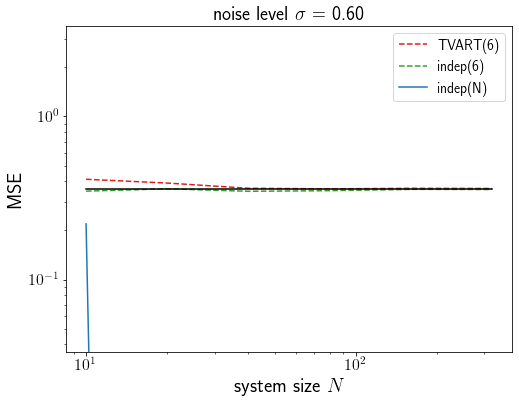

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


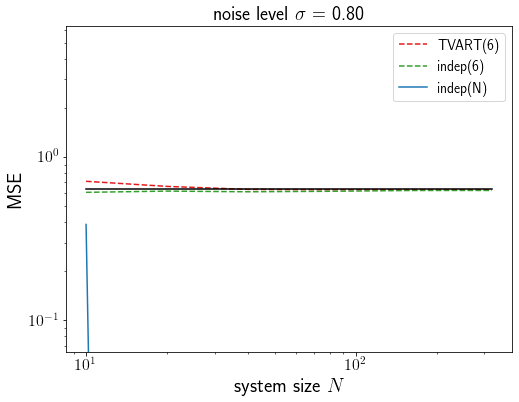

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


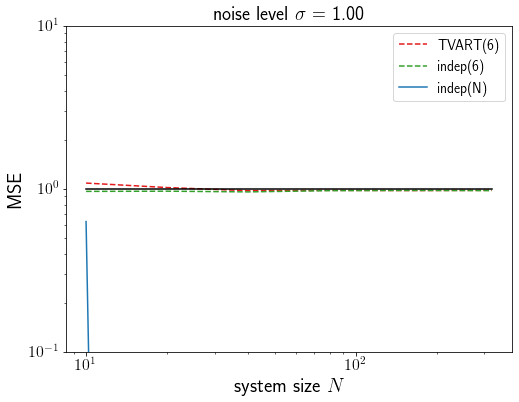

In [10]:
import matplotlib
import seaborn as sns

#sns.set()

rgb_values = sns.color_palette("Paired")

plt.rc('text', usetex=True)
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams.update({'font.size': 16})

#plt.loglog(data['N'], data['err_2'])

for plot_type in ['err_inf', 'err_2', 'err_fro', 'model_MSE']:
    for noise_std in data['noise_std'].unique():
        this_data = data[data['noise_std'] == noise_std].copy()
        fig, ax = plt.subplots(figsize=(8,6))
        for key, grp in this_data.sort_values('model').groupby(['model']):
            to_plot = grp.groupby(['N']).mean()
            skip_plot = False
            if key == 'indep(N)':
                style = '-'
                color = rgb_values[1]
            elif key == 'indep(4)':
                style = '-'
                color = rgb_values[3]
            elif key == 'TVART(4)':
                style = '-'
                color = rgb_values[5]
            elif key == 'SLDS(4)':
                style = '-'
                color = rgb_values[7]
            elif key == 'SLDS(6)':
                style = '--'
                color = rgb_values[7]
            elif key == 'indep(6)':
                style = '--'
                color = rgb_values[3]
            elif key == 'TVART(6)':
                style = '--'
                color = rgb_values[5]
            else:
                skip_plot = True
            if not skip_plot:
                ax = to_plot.plot(ax=ax, kind='line', y=plot_type, label=key, logx=True, logy=True,
                             style=style, color=color)
        plt.title('noise level $\sigma =$ %0.2f' % noise_std)
        plt.legend(loc='upper right', fontsize=14)
        plt.xlabel('system size $N$', fontsize=20)
        if plot_type == 'err_inf':
            plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_\mathrm{max}$", fontsize=20)
#             plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_\mathrm{max}$", fontsize=20)
            #plt.ylim([10**-3, 10**1.5])
        elif plot_type == 'err_2':
            plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_{2}$", fontsize=20)
#             plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_{2}$", fontsize=20)
            #plt.ylim([10**-1, 10**2.5])
        elif plot_type == 'err_fro':
            plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_F$", fontsize=20)
#             plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_F$", fontsize=20)
            #plt.ylim([10**-1, 10**2.5])
        elif plot_type == 'model_MSE':
            plt.ylabel("MSE", fontsize=20)
            plt.plot([10, 320], [noise_std**2, noise_std**2], 'k-')
            lim_low, lim_hi = ax.get_ylim()
            #lim_low = max(lim_low, 10**-3, noise_std**2 / 10)
            lim_low = noise_std ** 2 / 10
            lim_hi = noise_std ** 2 * 10
            plt.ylim([lim_low, lim_hi])
            #plt.ylim([10**-1, 10**1])
        #plt.xlim([10, 10**3])
        plt.savefig("../figures/switching_sigma_" + str(noise_std) + "_" + plot_type + ".eps")
        plt.show()
    #plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


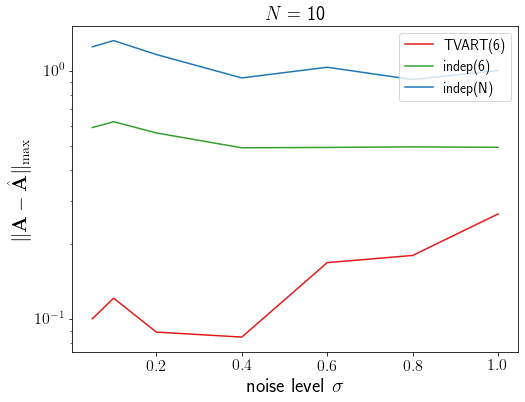

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


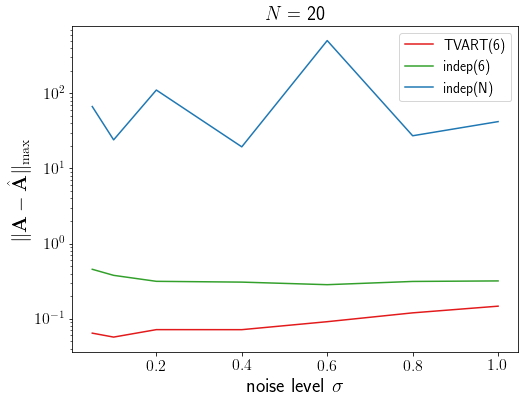

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


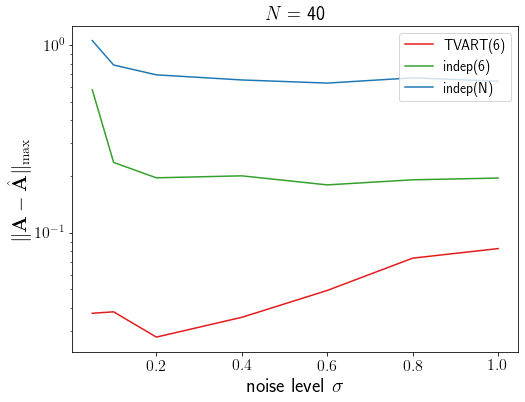

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


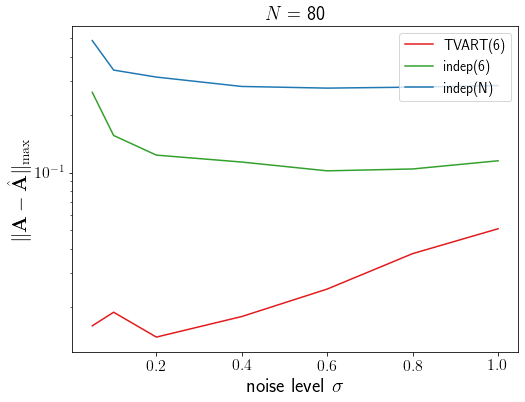

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


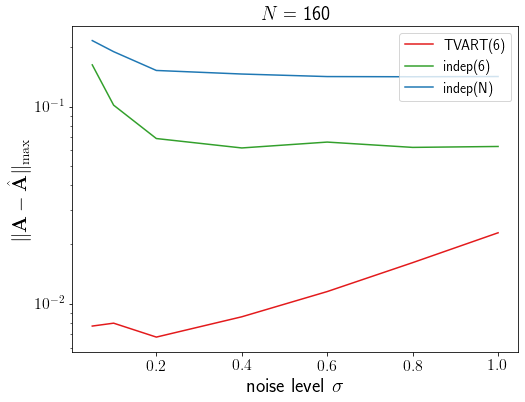

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


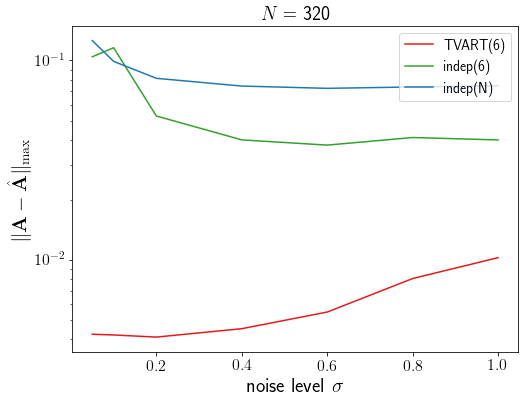

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


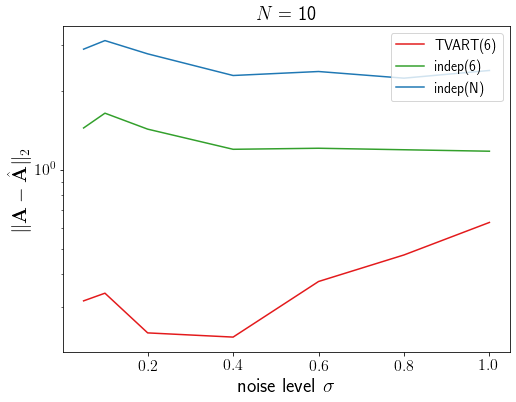

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


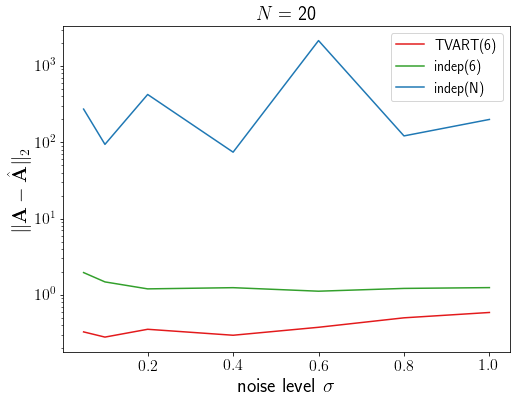

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


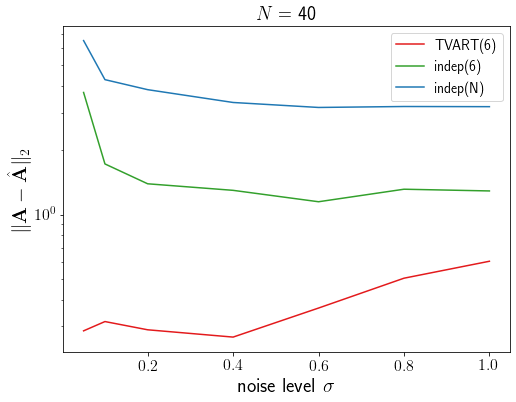

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


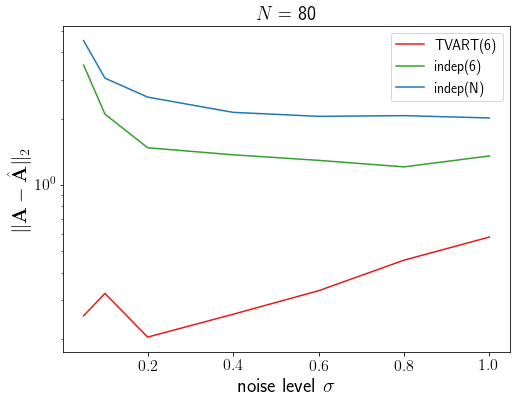

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


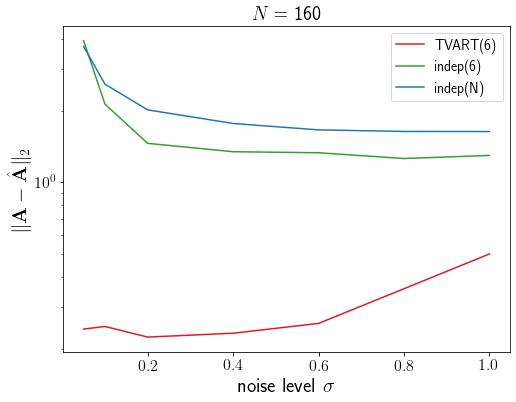

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


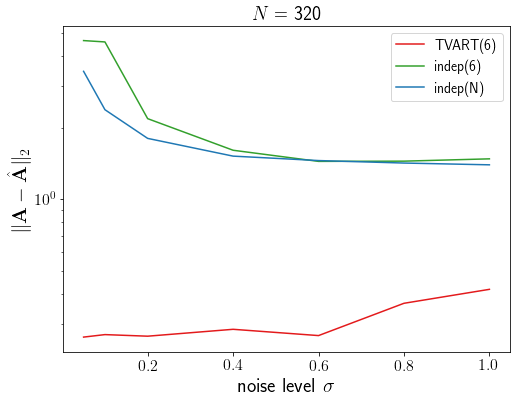

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


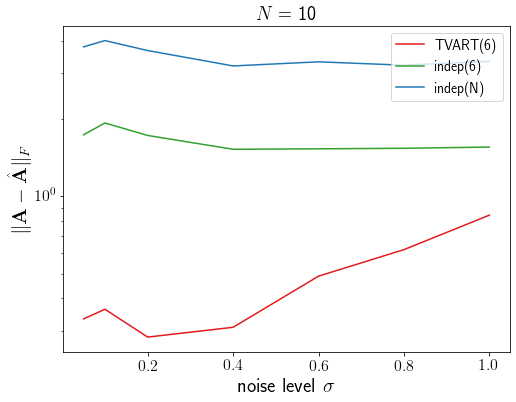

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


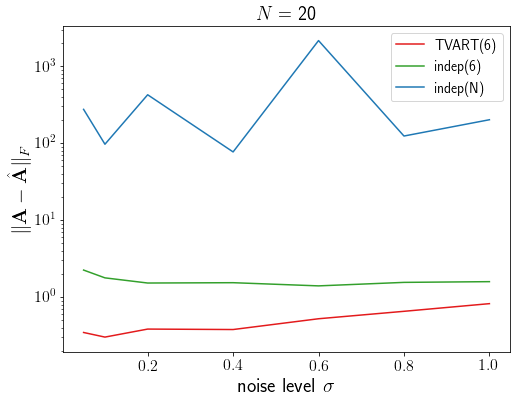

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


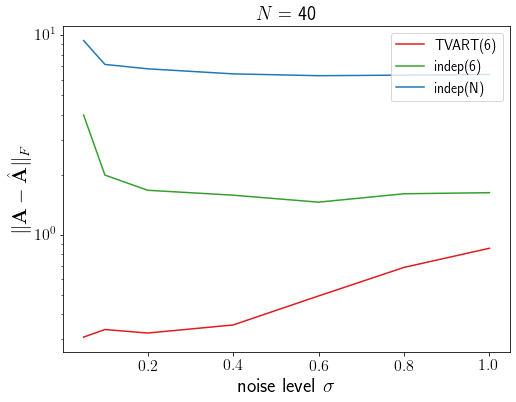

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


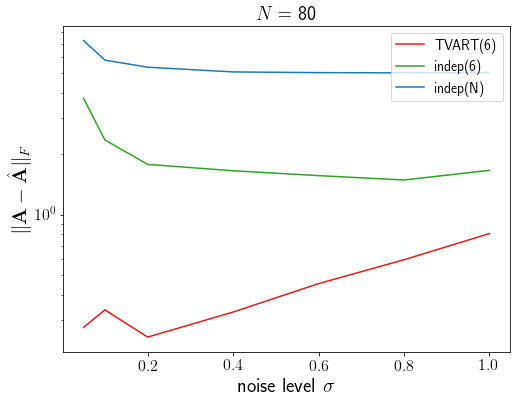

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


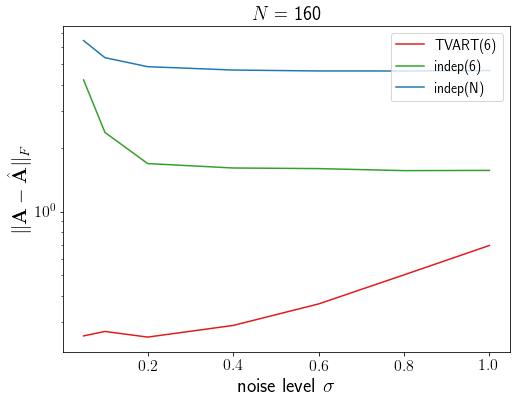

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


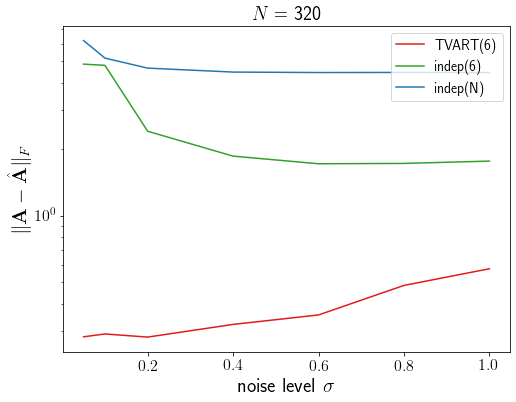

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


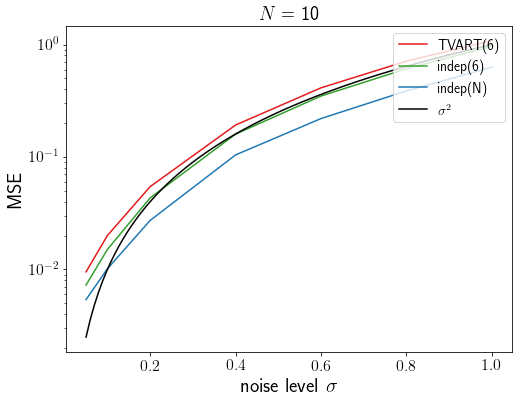

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


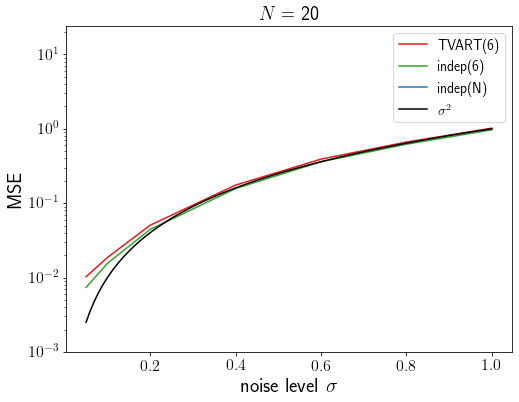

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


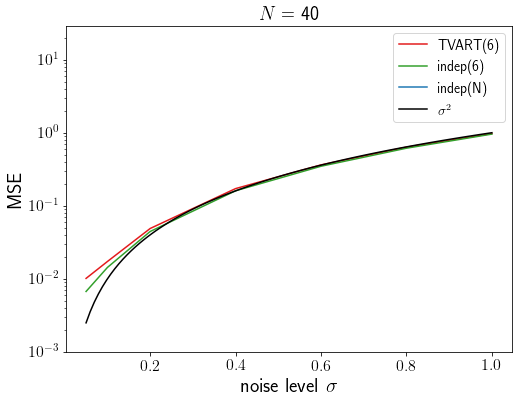

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


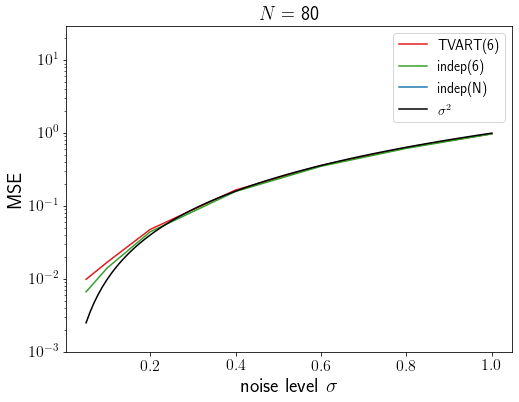

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


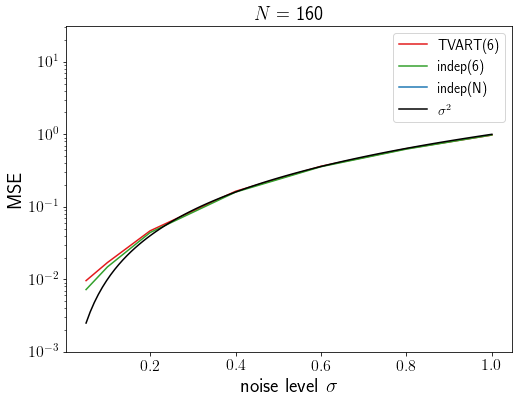

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


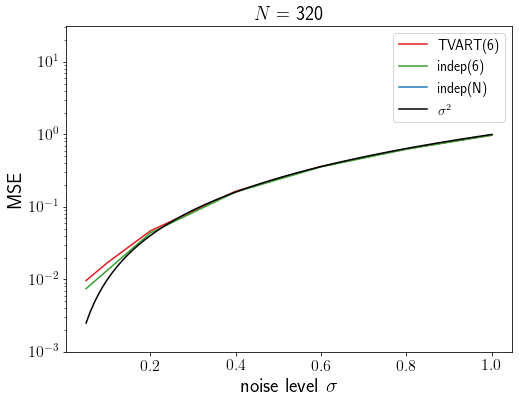

In [9]:
for plot_type in ['err_inf', 'err_2', 'err_fro', 'model_MSE']:
    for N in data['N'].unique():
        this_data = data[data['N'] == N].copy()
        fig, ax = plt.subplots(figsize=(8,6))
        for key, grp in this_data.sort_values('model').groupby(['model']):
            to_plot = grp.groupby(['noise_std']).mean()
            skip_plot = False
            if key == 'indep(N)':
                style = '-'
                color = rgb_values[1]
            elif key == 'indep(4)':
                style = '-'
                color = rgb_values[3]
            elif key == 'TVART(4)':
                style = '-'
                color = rgb_values[5]
            elif key == 'SLDS(4)':
                style = '-'
                color = rgb_values[7]
            elif key == 'SLDS(6)':
                style = '--'
                color = rgb_values[7]
            elif key == 'indep(6)':
                style = '-'
                color = rgb_values[3]
            elif key == 'TVART(6)':
                style = '-'
                color = rgb_values[5]
            else:
                skip_plot = True
            if not skip_plot:
                ax = to_plot.plot(ax=ax, kind='line', y=plot_type, label=key, logx=False, logy=True,
                             style=style, color=color)
        plt.title('$N =$ %d' % N)
        plt.legend(loc='upper right', fontsize=14)
        plt.xlabel("noise level $\sigma$", fontsize=20)
        if plot_type == 'err_inf':
            plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_\mathrm{max}$", fontsize=20)
#             plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_\mathrm{max}$", fontsize=20)
            #plt.ylim([10**-3, 10**1.5])
        elif plot_type == 'err_2':
            plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_{2}$", fontsize=20)
#             plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_{2}$", fontsize=20)
            #plt.ylim([10**-1, 10**2.5])
        elif plot_type == 'err_fro':
            plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_F$", fontsize=20)
#             plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_F$", fontsize=20)
            #plt.ylim([10**-1, 10**2.5])
        elif plot_type == 'model_MSE':
            plt.ylabel("MSE", fontsize=20)
            x = np.linspace(0.05, 1.0, 100)
            plt.plot(x, x**2, 'k-', label='$\sigma^2$')
            lim_low, lim_hi = ax.get_ylim()
            lim_low = max(lim_low, 10**-3)
            plt.ylim([lim_low, lim_hi])
            plt.legend(loc='upper right', fontsize=14)
        #plt.xlim([10, 10**3])
        plt.savefig("../figures/switching_N_" + str(N) + "_" + plot_type + "_vs_noise.eps")
        plt.show()